In [1]:
from dataset_utils import acws
from dataset_utils import cartoonset
from dataset_utils import celeba
from dataset_utils import cifar
from dataset_utils import fashion_mnist
from dataset_utils import mnist
from dataset_utils import mnist_m
#from dataset_utils import m2nist
#from dataset_utils import pacs
from dataset_utils import svhn
#from dataset_utils import visda
#from dataset_utils import tiny_imagenet

from dataset_utils.tfrecords_utils import get_tf_dataset

import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
if not os.path.exists('TFRecords'):
    os.mkdir('TFRecords')

# Table of Contents 

---

In alphabetical order,

  * [ACwS](#acws) (Apparel Classification with Style)
  * [CartoonSet](#cartoonset)
  * [CelebA](#celeba)
  * [CIFAR-10](#cifar10)
  * [CIFAR-100](#cifar100)
  * [Fashion MNIST](#fashion_mnist)
  * [MNIST dataset](#mnist)
  * [MNIST-M dataset](#mnist-m)
  * [M2NIST dataset](#m2nist)
  * [SVHN dataset](#svhn)
  * [VisDA](#visda) (Visual Domain Adaptation challenge - 2017 Classification track)
  * [Tiny ImageNet](#tiny_imagenet)

### Notes on the API

The module for a dataset `data` is contained in `dataset_utils.data.py`. It contains three main objects: a `Features` description, a `Converter` and a `Loader`.

#### Features
A `Features` object defines the content of a TFRecord example. It is initialized from a list of tuples, where each tuple represents a feature as:
  * **name:** a name, which will be the corresponding feature key in the parsed dictionnary
  * **type:** the type of the feature, one of int, float or bytes (see `tfrecords_utils.FeatureType`)
  * **length:** whether the tuple should be of fixed or variable length (see `tfrecords_utils.FeatureLength`)
  * **shape:** if the length is fixed, the shape of the feature, which is a nested list of integers.
  * **default:** A default value for the Records when loading (or `None` if no missing data)



#### Converter
A converter object contains one main method, `convert` that generates the TFRecords.

It generally takes as arguments
  * **target_path**, the path where to solve the TFRecords to.
  * **compression_type**, one of None, 'gzip' or 'zlib', that determines the compression option for the TFRecords. 
  * **save_image_in_records**, a boolean which indicates whether to store the image directly in the TFRecords; if the images are large, it can be useful to compress the TFRecords using `compression_type`. Otherwise, if that argument is `False`, the function only stores the path to the image, which will then be loaded by the `tf.data.Dataset` object.
  
 Additionally, in some cases this method takes a keyword argument `sort`; If this is `True`, the entries in the TFRecords will be sorted in someway, e.g. by class labels. Note that this means the `shuffle_buffer` size should be at least equal to the number of samples in the dataset for proper shuffling (hence not optimal for large datasets), but it can be convenient to quickly filter/sample the dataset based on classes.


#### Loader
A `Loader` object simply builds a proper parsing function to extract data from the TFRecords and format it correctly. Such a function can then be passed to the `tf.data.Dataset` API `map` function to parse the TFRecords dataset.

<h1><img src="images/mnist.png" align="left" width="25px">&nbsp;[MNIST](http://yann.lecun.com/exdb/mnist/) </h1>

---
<a id='mnist'></a> 

TFRecords will contain:

  * `image`: (28, 28, 1) uint8-array
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [7]:
# `source_path` is a directory containing `.ubyte` files as downloaded on the original website
source_path = os.path.expanduser('~/Datasets/MNIST/')
target_path = 'TFRecords/tf_mnist'
compression_type = None

In [8]:
%%time
converter = mnist.MNISTConverter(source_path)
converter.convert(target_path, compression_type=compression_type)

Loading original MNIST data from /home/aroyer/Datasets/MNIST/
Load train: 60000 / 60000
Wrote train in file TFRecords/tf_mnist_train (51.16MB)

Load test: 10000 / 10000
Wrote test in file TFRecords/tf_mnist_test (8.52MB)

CPU times: user 10.6 s, sys: 1.61 s, total: 12.3 s
Wall time: 10.8 s


Contents:
   class: Tensor("class_label:0", shape=(), dtype=int32)
   id: Tensor("index:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(128, 128, 1), dtype=float32)


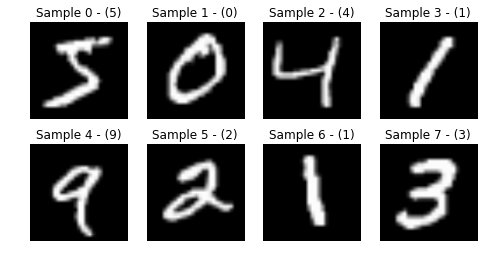

In [6]:
loader = mnist.MNISTLoader(image_size=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset(
        '%s_train' % target_path, loader.parsing_fn, compression_type=compression_type)
    with tf.Session() as sess:
        data_ = sess.run(data)        
        
_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(np.tile(data_['image'][i], (1, 1, 3))); ax.set_axis_off()
plt.show()

<h1><img src="images/svhn.png" align="left" width="25px">&nbsp;[SVHN](http://ufldl.stanford.edu/housenumbers/)</h1>

---
<a id='svhn'></a>

TFRecords will contain:

  * `image`: (32, 32, 3) uint8-array
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [3]:
# `source_path` is a directory containing train, test and extra `.mat` files containing 32x32 images
source_path = os.path.expanduser('~/Datasets/SVHN/')
target_path = 'TFRecords/tf_svhn'
compression_type = None

In [24]:
%%time
converter = svhn.SVHNConverter(source_path)
converter.convert(target_path, compression_type=compression_type)

Loading original SVHN data from /home/aroyer/Datasets/SVHN/
Load train: 73257 / 73257
Wrote train in file TFRecords/tf_svhn_train (230.08MB)

Load test: 26032 / 26032
Wrote test in file TFRecords/tf_svhn_test (81.75MB)

CPU times: user 15.6 s, sys: 3.02 s, total: 18.6 s
Wall time: 16.1 s


Contents:
   class: Tensor("class_label:0", shape=(), dtype=int32)
   id: Tensor("index:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)


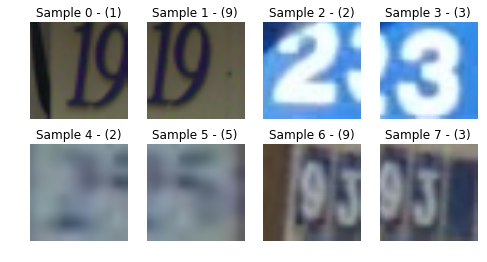

In [4]:
loader = svhn.SVHNLoader(image_size=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset(
        '%s_train' % target_path, loader.parsing_fn, compression_type=compression_type)
    with tf.Session() as sess:
        data_ = sess.run(data)   

_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(data_['image'][i]); ax.set_axis_off()
plt.show()

<h1><img src="images/mnistm.png" align="left" width="25px">&nbsp;[MNIST-M](http://yaroslav.ganin.net/)</h1>

---
<a id='mnist-m'></a>

TFRecords will contain:

  * `image`: (32, 32, 3) uint8-array
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [5]:
# `source_path` is a directory containing the `mnist_m_test` and `mnist_m_train` image folders
# See download link to either download the unpacked version or generate images from scratch
source_path = os.path.expanduser('~/Datasets/mnist_m/')
target_path = 'TFRecords/tf_mnist-m'
compression_type = None

In [6]:
%%time
converter = mnist_m.MNISTMConverter(source_path)
converter.convert(target_path, compression_type=compression_type)

Loading original MNIST-M data from /home/aroyer/Datasets/mnist_m/
Load train: 59001 / 59001
Wrote train in file TFRecords/tf_mnist-m_train (185.31MB)

Load test: 9001 / 9001
Wrote test in file TFRecords/tf_mnist-m_test (28.26MB)

CPU times: user 26.3 s, sys: 13.4 s, total: 39.7 s
Wall time: 1min 15s


Contents:
   class: Tensor("class_label:0", shape=(), dtype=int32)
   id: Tensor("index:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)


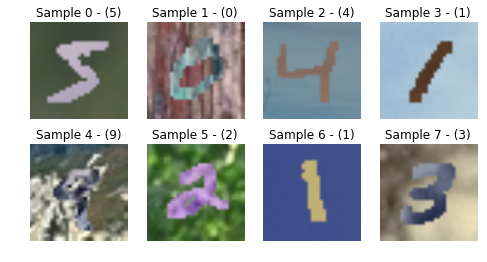

In [7]:
loader =  mnist_m.MNISTMLoader(image_size=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset(
        '%s_train' % target_path, loader.parsing_fn, compression_type=compression_type)
    with tf.Session() as sess:
        data_ = sess.run(data)   

_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(data_['image'][i]); ax.set_axis_off()
plt.show()

<h1><img src="images/cartoonset.png" align="left" width="25px">&nbsp;[CartoonSet](https://google.github.io/cartoonset/)</h1>

---
<a id='cartoonset'></a>


TFRecords will contain:

  * `image`: Either a (500, 500, 3) uint8-array or a string containing the relative filename of the image; depending of the value of the *save_image_in_records* argument.
  * `bounding_box`: Four coordinates of the bounding box englobing the cartoon avatar [ymin, xmin, ymax, xmax].
  * `chin_length`: The chin length attribute (3 possible values)
  * `eye_angle`: The eye angle attribute (3 possible values)
  * `eye_color`: The eye color attribute (5 possible values)
  * `eye_eyebrow_distance`: The distance between eye and eyebrow attribute (3 possible values)
  * `eye_lashes`: The eye lashes attribute (2 possible values)
  * `eye_lid`: The eye lid attribute (2 possible values)
  * `eye_slant`: The eye slant attribute (3 possible values)
  * `eyebrow_shape`: The eyebrow shape attribute (14 possible values)
  * `eyebrow_thickness`: The eyebrow thickness attribute (4 possible values)
  * `eyebrow_weight`: The eyebrow weight attribute (2 possible values)
  * `eyebrow_width`: The eyebrow width attribute (3 possible values)
  * `face_color`: The face color attribute (11 possible values)
  * `face_shape`: The face shape attribute (7 possible values)
  * `facial_hair`: The facial hair attribute (15 possible values)
  * `glasses`: The glasses attribute (12 possible values)
  * `glasses_color`: The eye angle attribute (7 possible values)
  * `hair`: The hair attribute (111 possible values)
  * `hair_color`: The hair color attribute (10 possible values)

In [38]:
# `source_path` is the directory corresponding to the extracted archive
source_path = os.path.expanduser('~/Datasets/cartoonset100k/')
target_path = 'TFRecords/tf_cartoonset'
save_image_in_records = False
compression_type = None

In [40]:
%%time
converter = cartoonset.CartoonSetConverter(source_path)
converter.convert(target_path, 
                  train_split=[0, 1, 2, 3, 4, 5],
                  val_split=[6],
                  test_split=[7, 8, 9], 
                  compression_type=compression_type,
                  save_image_in_records=save_image_in_records)

Found 10 data folders:
  /home/aroyer/Datasets/cartoonset100k/0
  /home/aroyer/Datasets/cartoonset100k/1
  /home/aroyer/Datasets/cartoonset100k/2
  /home/aroyer/Datasets/cartoonset100k/3
  /home/aroyer/Datasets/cartoonset100k/4
  /home/aroyer/Datasets/cartoonset100k/5
  /home/aroyer/Datasets/cartoonset100k/6
  /home/aroyer/Datasets/cartoonset100k/7
  /home/aroyer/Datasets/cartoonset100k/8
  /home/aroyer/Datasets/cartoonset100k/9

Load train
  folder 6/6: image 10000/10000
Wrote train in file TFRecords/tf_cartoonset_train (30.35MB)

Load val
  folder 1/1: image 10000/10000
Wrote val in file TFRecords/tf_cartoonset_val (5.03MB)

Load test
  folder 3/3: image 10000/10000
Wrote test in file TFRecords/tf_cartoonset_test (15.09MB)
CPU times: user 9min 51s, sys: 36.7 s, total: 10min 27s
Wall time: 12min 7s


Contents:
   chin_length: Tensor("ParseSingleExample/ParseSingleExample:1", shape=(), dtype=int64)
   eye_angle: Tensor("ParseSingleExample/ParseSingleExample:2", shape=(), dtype=int64)
   eye_color: Tensor("ParseSingleExample/ParseSingleExample:3", shape=(), dtype=int64)
   eye_eyebrow_distance: Tensor("ParseSingleExample/ParseSingleExample:4", shape=(), dtype=int64)
   eye_lashes: Tensor("ParseSingleExample/ParseSingleExample:5", shape=(), dtype=int64)
   eye_lid: Tensor("ParseSingleExample/ParseSingleExample:6", shape=(), dtype=int64)
   eye_slant: Tensor("ParseSingleExample/ParseSingleExample:7", shape=(), dtype=int64)
   eyebrow_shape: Tensor("ParseSingleExample/ParseSingleExample:8", shape=(), dtype=int64)
   eyebrow_thickness: Tensor("ParseSingleExample/ParseSingleExample:9", shape=(), dtype=int64)
   eyebrow_weight: Tensor("ParseSingleExample/ParseSingleExample:10", shape=(), dtype=int64)
   eyebrow_width: Tensor("ParseSingleExample/ParseSingleExample:11", shape=(), dtype=int64

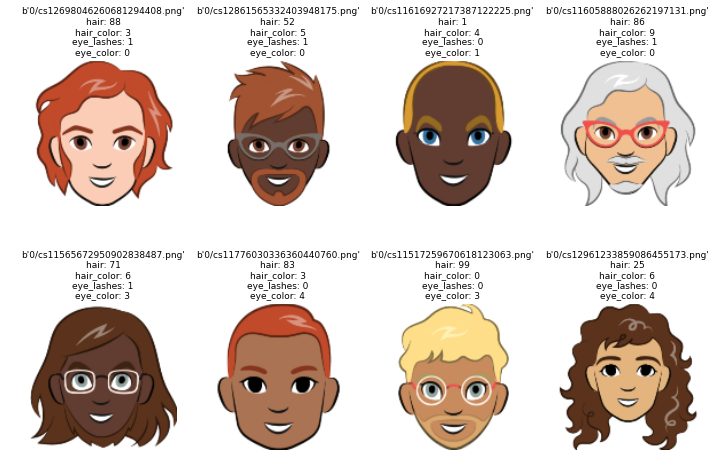

In [41]:
loader = cartoonset.CartoonSetLoader(image_size=128,
                                     crop_images=True, 
                                     keep_crop_aspect_ratio=True,
                                     one_hot_attributes=False,
                                     save_image_in_records=save_image_in_records,
                                     image_dir=source_path,
                                     verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset(
        '%s_train' % target_path, loader.parsing_fn, compression_type=compression_type,)
    if 'bounding_box' in data:
        data['image'] = tf.image.draw_bounding_boxes(
            data['image'], tf.expand_dims(data['bounding_box'], axis=1))
    with tf.Session() as sess:
        data_ = sess.run(data)
        
# Display
_, axis = plt.subplots(2, 4, figsize=(12, 8))
for i, ax in enumerate(axis.flatten()):
    title = ('%s\n' % data_['image_path'][i]) if 'image_path' in data_ else ''
    ax.set_title(title + '\n'.join('%s: %s' % (key, data_[key][i]) for key in [
        'hair', 'hair_color', 'eye_lashes', 'eye_color']), fontsize=9)
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()

<h1><img src="images/celeba.png" align="left" width="25px">&nbsp;[CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)</h1>

---
<a id='celeba'></a>

TFRecords will contain:

  * `image`: Either a (-, -, 3) uint8-array or a string containing the relative filename of the image;  depending of the value of the *save_image_in_records* argument.
  * `bounding_box`: Four coordinates of the face bounding box, [xmin, ymin, xmax, ymax]. Normalized by the size of the image to fall in [0, 1].
  * `landmarks`: (5, 2) float array containing the landmarks coordinates [x, y]. Normalized by the image size to fall in [0, 1].
  * `attributes`: A (40,) float array containing the binary value for each attribute (1 if present, -1 if absent)

In [12]:
# `source_path` is a directory containing:
#     * `list_eval_partition.txt` (the train/val/test partition of Celeba)
#     * `Anno` a directory containing the CelebA annotation
#     * `Img` a directory regrouping folders of different Celeba versions (e.g., `img_align_celeba`). 
source_path = os.path.expanduser('~/Datasets/Celeba/')
target_path = 'TFRecords/tf_celeba'
cropped_and_aligned = True     # whether to use the cropped and aligned CelebA or the raw version
save_image_in_records = False 
compression_type = None

In [13]:
%%time
converter = celeba.CelebaConverter(source_path, cropped_and_aligned=cropped_and_aligned)
converter.convert(target_path, 
                  compression_type=compression_type, 
                  save_image_in_records=save_image_in_records)


Load train
Image 162770/162770
Wrote train in file TFRecords/tf_celeba_train (52.25MB)

Load val
Image 19867/19867
Wrote val in file TFRecords/tf_celeba_val (6.38MB)

Load test
Image 19962/19962
Wrote test in file TFRecords/tf_celeba_test (6.41MB)

CPU times: user 3min 9s, sys: 25.3 s, total: 3min 34s
Wall time: 4min 30s


Contents:
   attributes: Tensor("attributes:0", shape=(40,), dtype=bool)
   bounding_box: Tensor("ParseSingleExample/ParseSingleExample:1", shape=(4,), dtype=float32)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)
   image_path: Tensor("image_path:0", shape=(), dtype=string)
   landmarks: Tensor("ParseSingleExample/ParseSingleExample:4", shape=(5, 2), dtype=float32)


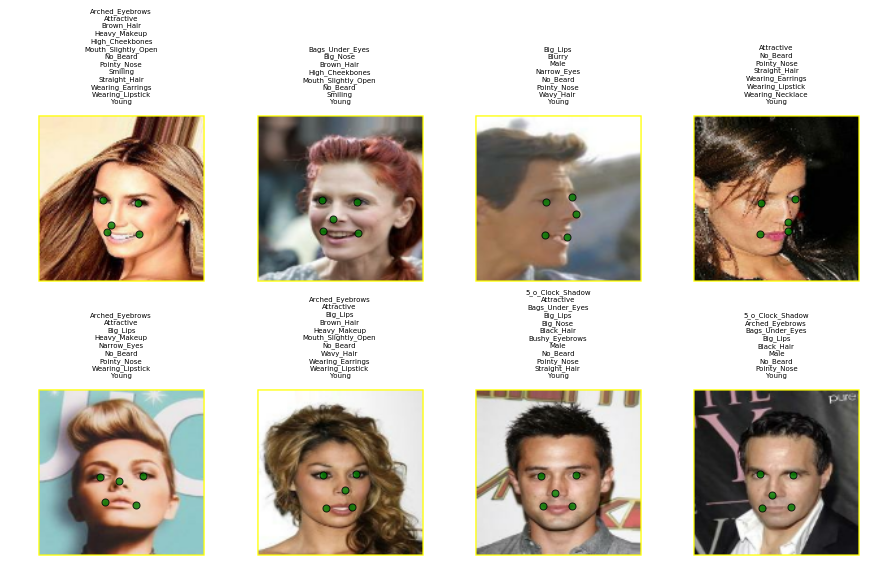

In [14]:
loader =  celeba.CelebaLoader(image_size=128,
                              save_image_in_records=save_image_in_records,
                              image_dir=source_path,
                              verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset(
        '%s_train' % target_path, loader.parsing_fn, compression_type=compression_type)
    if 'bounding_box' in data:
        data['image'] = tf.image.draw_bounding_boxes(
            data['image'], tf.gather(tf.expand_dims(data['bounding_box'], axis=1), [1, 0, 3, 2], axis=-1))
    with tf.Session() as sess:
        data_ = sess.run(data)
        
_, axis = plt.subplots(2, 4, figsize=(15, 9))
for i, ax in enumerate(axis.flatten()):
    image = data_['image'][i]
    landmarks = data_['landmarks'][i] * image.shape[:2]
    attributes = [celeba.CelebaLoader.attributes_list[x] for x in np.where(data_['attributes'][i])[0]]
    ax.set_title('\n'.join(attributes), fontsize=7)
    ax.imshow(image); ax.set_axis_off()
    ax.scatter(landmarks[:, 0], landmarks[:, 1], s=50, c='g', marker='o', alpha=0.8)    
plt.show()

<h1><img src="images/visda.png" align="left" width="25px">&nbsp;VisDA</h1>

---
<a id='visda'></a>

Original Download [[link]](http://ai.bu.edu/visda-2017/). This is the classification track data for the 2017 edition of the VisDA challenge

TFRecords will contain:

  * `image`: Either a (-, -, 3) uint8-array or a string containing the relative filename of the image;  depending of the value of the *save_image_in_records* argument.
  * `class`: scalar in 0-11. Only for train and val data.

In [128]:
# `source_path` is a directory containing the three directories `train`, `validation` and `test` as 
#     downloaded on the original website
# `target_path` is the base path to save TFRecords to
source_path = os.path.expanduser('~/Data/VisDA/Classification/')
target_path = 'TFRecords/tf_visda_classification'
save_image_in_records = False   # whether to save image directly in TFrecords or only a path to it

In [129]:
%%time
converter = visda.VisdaClassificationConverter(source_path)
converter.convert(target_path, save_image_in_records=save_image_in_records)


Load train
Image 152397/152397
Wrote train in file TFRecords/tf_visda_classification_train

Load val
Image 55388/55388
Wrote val in file TFRecords/tf_visda_classification_val

Load test
Image 72372/72372
Wrote test in file TFRecords/tf_visda_classification_test

CPU times: user 12.9 s, sys: 239 ms, total: 13.1 s
Wall time: 12.9 s


Creating dataset with batch_size 8 and shuffle buffer 100000
Outputs:
   class: Tensor("class:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)
   image_path: Tensor("image_path:0", shape=(), dtype=string)


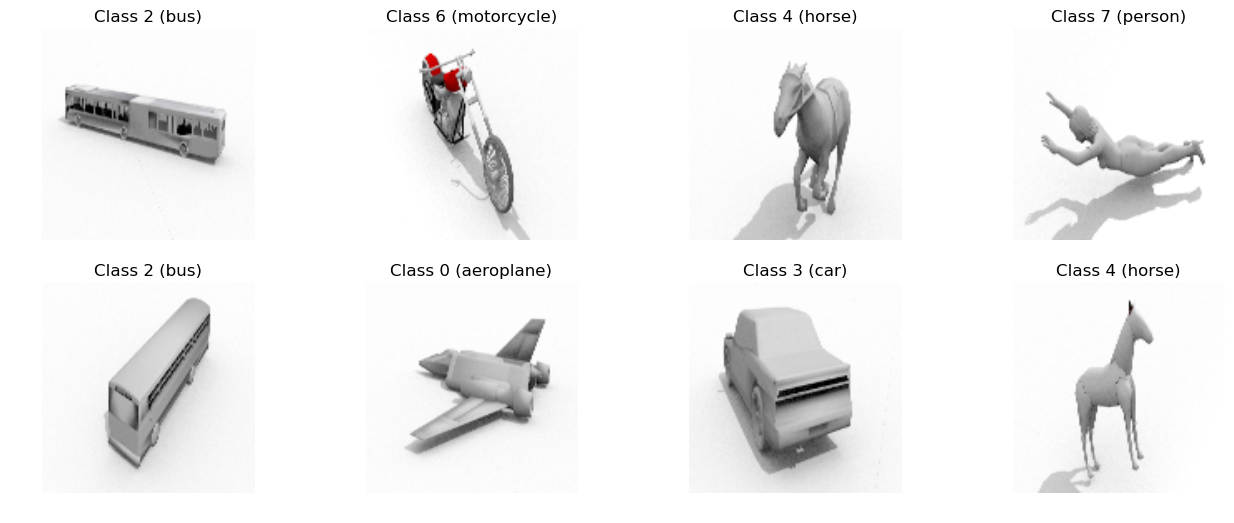

In [132]:
loader = visda.VisdaClassificationLoader(
    save_image_in_records=save_image_in_records, data_dir=source_path, resize=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn, shuffle_buffer=100000)
    with tf.Session() as sess:
        data_ = sess.run(data)
        
_, axis = plt.subplots(2, 4, figsize=(16, 6))
for i, ax in enumerate(axis.flatten()):
    if data_['class'][i] > -1:
        ax.set_title('Class %d (%s)' % (data_['class'][i], loader.classes_names[data_['class'][i]]))
    ax.imshow(data_['image'][i]); ax.set_axis_off()
plt.show()

<h1><img src="images/pacs.png" align="left" width="25px">&nbsp;PACS</h1>

---
<a id='pacs'></a>

Original Download [[link]](http://www.eecs.qmul.ac.uk/~dl307/project_iccv2017)

TFRecords will contain:

  * `image`: Either a (-, -, 3) uint8-array or a string containing the relative filename of the image;  depending of the value of the *save_image_in_records* argument.
  * `class_content`: scalar in 0-6 containing the category of the depicted object.
  * `class_style`: scalar in 0-3 containing the style of the image. Alternatively, the option `separate_styles` allows to generate an independant TFRecords for each of the style.

In [3]:
# `source_path` corresponds to the directory extracted from the archive downloaded from the original website
# `target_path` is the base path to save TFRecords to
source_path = os.path.expanduser('~/Data/PACS/')
target_path = 'TFRecords/tf_pacs'
split_path = 'TFRecords/pacs_data_splits.txt'  # path to save the generated data split (optional)
save_image_in_records = False                  # whether to save image directly in TFrecords or only a path to it
separate_styles = False                        # whether to generate a TFRecords for each style independently

In [4]:
%%time
converter = pacs.PACSConverter(source_path)
converter.generate_split(split_path, train=0.7, val=0.1, test=0.2)  # (opt) generate a random train/val/test split
converter.convert(target_path, save_image_in_records=save_image_in_records, separate_styles=separate_styles)

Splits saved in TFRecords/pacs_data_splits.txt

Load train
style 4/4 - content 7/7
Wrote train in file TFRecords/tf_pacs_train

Load val
style 4/4 - content 7/7
Wrote val in file TFRecords/tf_pacs_val

Load test
style 4/4 - content 7/7
Wrote test in file TFRecords/tf_pacs_test

CPU times: user 520 ms, sys: 24.3 ms, total: 544 ms
Wall time: 540 ms


[dataset] batch_size = 8, shuffle buffer = 10000
Outputs:
   class_content: Tensor("ToInt32:0", shape=(), dtype=int32)
   class_style: Tensor("ToInt32_1:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)
   image_path: Tensor("image_path:0", shape=(), dtype=string)


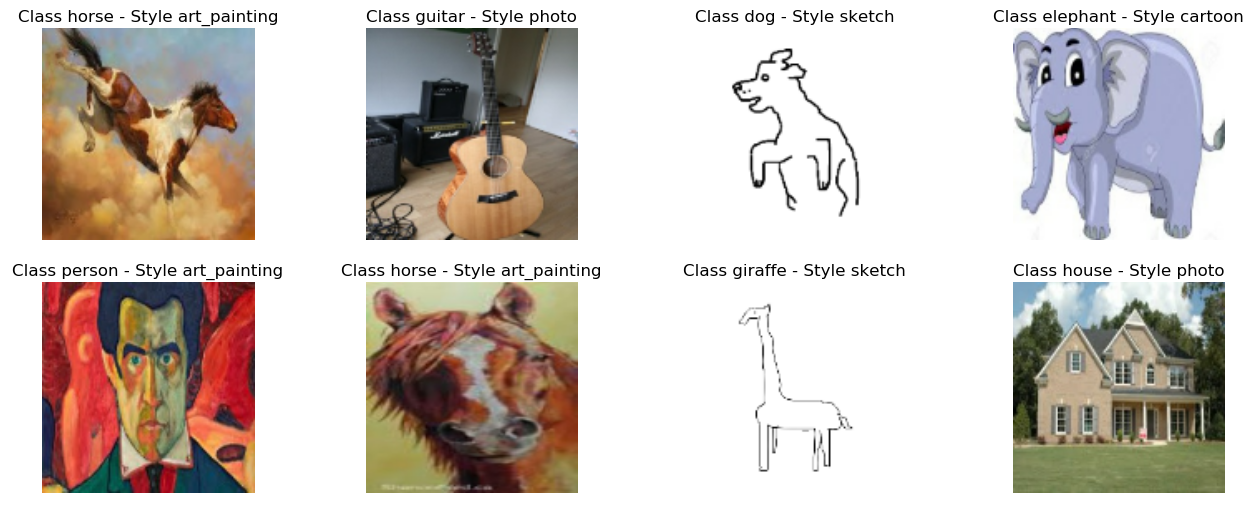

In [8]:
loader = pacs.PACSLoader(
    save_image_in_records=save_image_in_records, image_dir=source_path, image_size=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn, shuffle_buffer=10000)
    with tf.Session() as sess:
        data_ = sess.run(data)
        
_, axis = plt.subplots(2, 4, figsize=(16, 6))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Class %s - Style %s' % (loader.content_names[data_['class_content'][i]],
                                          loader.style_names[data_['class_style'][i]]))
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()

<h1><img src="images/m2nist.png" align="left" width="25px">&nbsp;M2NIST (Multidigit MNIST)</h1>

---
<a id='m2nist'></a>

Original Download [[link]](https://www.kaggle.com/farhanhubble/multimnistm2nist/home)

TFRecords will contain:

  * `image`: (64, 84, 1) uint8-array
  * `mask`: (64, 84, 10) array representing the segmentation mask

In [9]:
# `source_path` is a directory containing `.npy` files as downloaded on the original website
# `target_path` is the base path to save TFRecords to
source_path = os.path.expanduser('~/Data/M2NIST/')
target_path = 'TFRecords/tf_m2nist'

In [54]:
%%time
converter = m2nist.M2NISTConverter(source_path)
converter.convert(target_path)

Loading original Multidigit MNIST data from /home/aroyer/Data/M2NIST/
Load train: 3500 / 3500
Wrote train in file TFRecords/tf_m2nist_train

Load val: 499 / 499
Wrote val in file TFRecords/tf_m2nist_val

Load test: 1001 / 1001
Wrote test in file TFRecords/tf_m2nist_test

CPU times: user 2.56 s, sys: 1.59 s, total: 4.15 s
Wall time: 9.58 s


[dataset] batch_size = 8, shuffle buffer = 1
Outputs:
   id: Tensor("index:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(128, 128, 1), dtype=float32)
   mask: Tensor("ToFloat:0", shape=(128, 128, 10), dtype=float32)


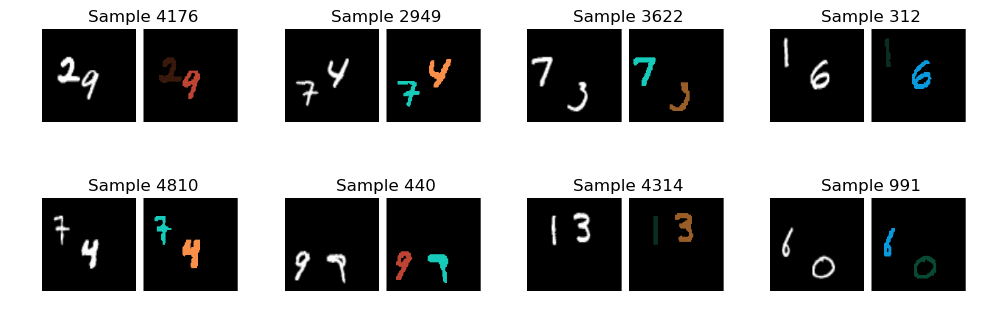

In [53]:
loader = m2nist.M2NISTLoader(image_size=128, verbose=True)
rbg_palette = np.array([(248, 183, 205), (246, 210, 224),  (200, 231, 245),  (103, 163, 217),  (6, 113, 183),
                        (249, 200, 14), (248, 102, 36),  (234, 53, 70), (102, 46, 155), (67, 188, 205)])
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)    
    with tf.Session() as sess:
        data_ = sess.run(data)   
        mask = m2nist.viz_mask(data_['mask'])
        image = np.tile(data_['image'], (1, 1, 1, 3))
        viz = np.concatenate([image, np.pad(mask, ((0, 0), (0, 0), (10, 10), (0, 0)),
                                            mode='constant', constant_values=1.)], axis=2)
        
_, axis = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d' % (data_['id'][i]))
    ax.imshow(viz[i]); ax.set_axis_off()
plt.show()

<h1><img src="images/fashion_mnist.png" align="left" width="25px">&nbsp;Fashion MNIST</h1>

---
<a id='fashion_mnist'></a>

Original Download [[link]](https://github.com/zalandoresearch/fashion-mnist)

TFRecords will contain:

  * `image`: (28, 28, 1) uint8-array
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [3]:
# `source_path` is a directory containing `.ubyte` files as downloaded on the original website
source_path = os.path.expanduser('~/Datasets/Fashion MNIST/')
target_path = 'TFRecords/tf_fashion_mnist'
compression_type = None

In [4]:
%%time
converter = fashion_mnist.FashionMNISTConverter(source_path)
converter.convert(target_path, compression_type=compression_type)

Loading original FashionMNIST data from /home/aroyer/Datasets/Fashion MNIST/
Load train: 60000 / 60000
Wrote train in file TFRecords/tf_fashion_mnist_train (51.16MB)

Load test: 10000 / 10000
Wrote test in file TFRecords/tf_fashion_mnist_test (8.52MB)

CPU times: user 10.5 s, sys: 1.58 s, total: 12.1 s
Wall time: 10.8 s


Contents:
   class: Tensor("class_label:0", shape=(), dtype=int32)
   id: Tensor("index:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(128, 128, 1), dtype=float32)


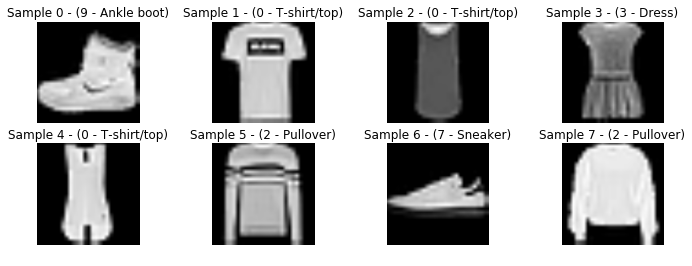

In [5]:
from importlib import reload
reload(fashion_mnist)
loader = fashion_mnist.FashionMNISTLoader(image_size=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset(
        '%s_train' % target_path, loader.parsing_fn, compression_type=compression_type)
    with tf.Session() as sess:
        data_ = sess.run(data)         
        
_, axis = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d - %s)' % (
            data_['id'][i], data_['class'][i], loader.classes_names[data_['class'][i]]))
    ax.imshow(np.tile(data_['image'][i], (1, 1, 3))); ax.set_axis_off()
plt.show()

<h1><img src="images/acws.png" align="left" width="25px">&nbsp;ACwS (Apparel Classification with Style)</h1>

---
<a id='acws'></a>

Original Download [[link]](https://data.vision.ee.ethz.ch/cvl/lbossard/accv12/)

TFRecords will contain:

  * `image`: (28, 28, 1) uint8-array (parsed to a float array in [0, 1] by the `MNISTLoader`)
  * `class`: scalar in 0-14

In [154]:
# `source_path` is the directory obtained by extracting the downloaded archive
source_path = os.path.expanduser('~/Data/fashion-data/')
target_path = 'TFRecords/tf_acws'
save_image_in_records = False  # whether to save image directly in TFrecords or only a path to it

In [94]:
%%time
converter = acws.ACWSConverter(source_path)
converter.convert(target_path, save_image_in_records=save_image_in_records)


Load train
Image 71093/71093
Wrote train in file TFRecords/tf_acws_train

Load test
Image 17858/17858
Wrote test in file TFRecords/tf_acws_test

CPU times: user 4.45 s, sys: 68.4 ms, total: 4.52 s
Wall time: 4.47 s


[dataset] batch_size = 8, shuffle buffer = 1
Outputs:
   class: Tensor("ToInt32:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)
   image_path: Tensor("image_path:0", shape=(), dtype=string)


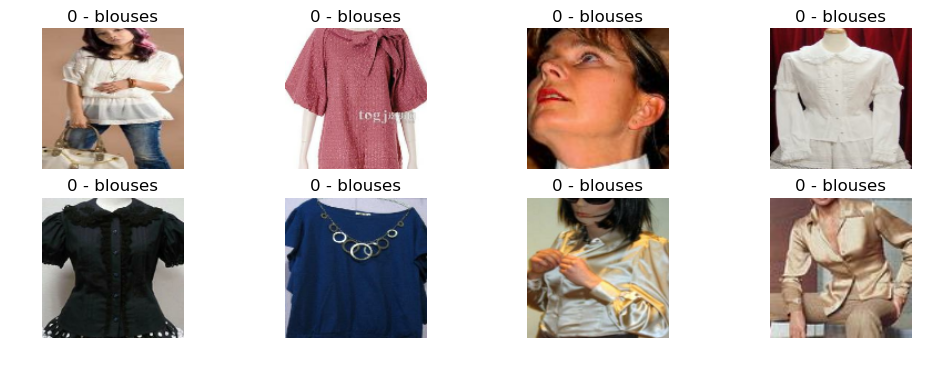

In [157]:
loader = acws.ACWSLoader(image_size=128, verbose=True, 
                         image_dir=os.path.join(source_path, 'images/'),
                         save_image_in_records=save_image_in_records)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
        
_, axis = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('%d - %s' % (data_['class'][i], loader.classes_names[data_['class'][i]]))
    ax.imshow(data_['image'][i]); ax.set_axis_off()
plt.show()

<h1><img src="images/tiny_imagenet.png" align="left" width="25px">&nbsp;Tiny ImageNet</h1>

---
<a id='tiny_imagenet'></a>

Original Download [[link]](https://tiny-imagenet.herokuapp.com/)

TFRecords will contain:

  * `image`: Either a (-, -, 3) uint8-array or a string containing the relative filename of the image;  depending of the value of the *save_image_in_records* argument.
  * `bounding box` (only in train/val): Four coordinates of the object bounding box, [xmin, ymin, xmax, ymax]. Normalized by the size of the image to fall in [0, 1].
  * `class` (only in train/val): scalar in 0-199
  * `class_str` (only in train/val): string representing the class synset

In [200]:
# `source_path` is the directory obtained when uncompressing the downloaded archive
# `target_path` is the base path to save TFRecords to
source_path = os.path.expanduser('~/Data/tiny-imagenet-200/')
target_path = 'TFRecords/tf_tiny_imagenet'
save_image_in_records = False  # whether to save image directly in TFrecords or only a path to it

In [201]:
%%time
converter = tiny_imagenet.TinyImageNetConverter(source_path)
converter.convert(target_path, save_image_in_records=save_image_in_records)


Load train
Image 100000/100000
Wrote train in file TFRecords/tf_tiny_imagenet_train

Load val
Image 10000/10000
Wrote val in file TFRecords/tf_tiny_imagenet_val

Load test
Image 10000/10000
Wrote test in file TFRecords/tf_tiny_imagenet_test

CPU times: user 59.5 s, sys: 4.07 s, total: 1min 3s
Wall time: 1min 12s


[dataset] batch_size = 8, shuffle buffer = 1
Outputs:
   bounding_box: Tensor("ParseSingleExample/Squeeze_bounding_box:0", shape=(4,), dtype=float32)
   class: Tensor("ToInt32:0", shape=(), dtype=int32)
   class_str: Tensor("DecodeBase64_1:0", shape=(), dtype=string)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)
   image_path: Tensor("image_path:0", shape=(), dtype=string)


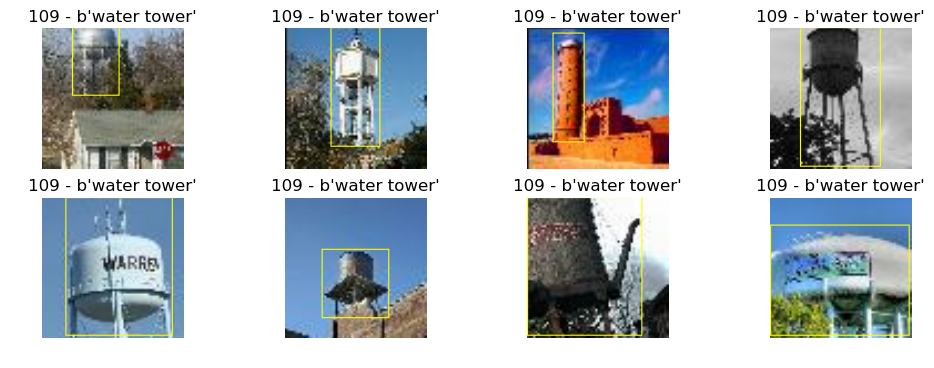

In [152]:
loader = tiny_imagenet.TinyImageNetLoader(image_size=128, verbose=True, 
                         image_dir=source_path,
                         save_image_in_records=save_image_in_records)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    data['image'] = tf.image.draw_bounding_boxes(data['image'], tf.expand_dims(data['bounding_box'], axis=1))
    with tf.Session() as sess:
        data_ = sess.run(data)
    
_, axis = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axis.flatten()):
    if 'class' in data_ and data_['class'][i] > 0:
        ax.set_title('%d - %s' % (data_['class'][i], data_['class_str'][i]))
    ax.imshow(data_['image'][i]); ax.set_axis_off()
plt.show()

<h1><img src="images/cifar10.png" align="left" width="25px">&nbsp;[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)</h1>

---
<a id='cifar10'></a>
TFRecords will contain:

  * `image`: A (32, 32, 3) uint8-array
  * `class`: scalar in 0-9
  * `class_str`: String containing the class name

In [16]:
# `source_path` is the directory obtained when directly uncompressing the downloaded python archive
source_path = os.path.expanduser('~/Datasets/CIFAR10/cifar-10-batches-py/')
target_path = 'TFRecords/tf_cifar10'
compression_type = None

In [17]:
%%time
converter = cifar.CIFAR10Converter(source_path)
converter.convert(target_path, compression_type=compression_type)


Load train
Batch 5/5
Wrote train in file TFRecords/tf_cifar10_train (157.67MB)

Load test
Batch 1/1
Wrote test in file TFRecords/tf_cifar10_test (31.53MB)

CPU times: user 4.26 s, sys: 280 ms, total: 4.54 s
Wall time: 5.04 s


Contents:
   class: Tensor("ToInt32:0", shape=(), dtype=int32)
   class_str: Tensor("DecodeBase64:0", shape=(), dtype=string)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)


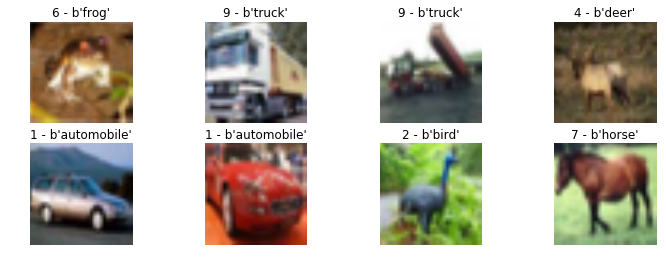

In [18]:
loader = cifar.CIFAR10Loader(image_size=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset(
        '%s_train' % target_path, loader.parsing_fn, compression_type=compression_type)
    with tf.Session() as sess:
        data_ = sess.run(data)
    
_, axis = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axis.flatten()):
    if 'class' in data_ and data_['class'][i] > 0:
        ax.set_title('%d - %s' % (data_['class'][i], data_['class_str'][i]))
    ax.imshow(data_['image'][i]); ax.set_axis_off()
plt.show()

<h1><img src="images/cifar10.png" align="left" width="25px">&nbsp;[CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html)</h1>

---
<a id='cifar100'></a>

TFRecords will contain:

  * `image`: A (32, 32, 3) uint8-array
  * `class`: scalar in 0-99 (fine label)
  * `coarse_class`: scalar in 0-19 (coarse label)
  * `coarse_class_str`: String containing the coarse class name (one of 20)

In [30]:
# `source_path` is the directory obtained when directly uncompressing the downloaded archive
source_path = os.path.expanduser('~/Datasets/CIFAR100/cifar-100-python/')
target_path = 'TFRecords/tf_cifar100'
compression_type = None

In [31]:
%%time
converter = cifar.CIFAR100Converter(source_path)
converter.convert(target_path, compression_type=compression_type)


Load train
Batch 1/1
Wrote train in file TFRecords/tf_cifar100_train (159.86MB)

Load test
Batch 1/1
Wrote test in file TFRecords/tf_cifar100_test (31.97MB)

CPU times: user 4.87 s, sys: 368 ms, total: 5.24 s
Wall time: 5.63 s


Contents:
   class: Tensor("ToInt32:0", shape=(), dtype=int32)
   coarse_class: Tensor("ToInt32_1:0", shape=(), dtype=int32)
   coarse_class_str: Tensor("DecodeBase64:0", shape=(), dtype=string)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)


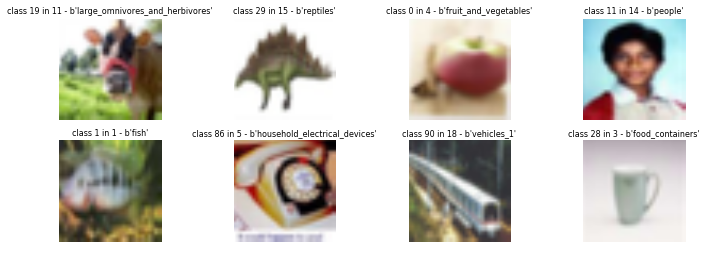

In [32]:
loader = cifar.CIFAR100Loader(image_size=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset(
        '%s_train' % target_path, loader.parsing_fn, compression_type=compression_type)
    with tf.Session() as sess:
        data_ = sess.run(data)
    
_, axis = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('class %d in %d - %s' % (
            data_['class'][i], data_['coarse_class'][i], data_['coarse_class_str'][i]), fontsize=8)
    ax.imshow(data_['image'][i]); ax.set_axis_off()
plt.show()